Social Media Sentiment Analysis (Twitter)

Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import string
import seaborn as sns

Importing Machine Learning Utilities

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Suppressing future warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

Loading Dataset

In [4]:
df = pd.read_csv("C:/Users/Sonali/Desktop/Dataset(Sentiments).csv",encoding='latin1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f0460d611d,not well,not well,negative,noon,60-70,Nicaragua,6624554.0,120340.0,55.0
1,6649f3558c,Not a prob hun,Not a prob,positive,night,70-100,Niger,24206644.0,1266700.0,19.0
2,24532ab83c,"at dads, watching some mtv and am going on sim...","at dads, watching some mtv and am going on sim...",neutral,morning,0-20,Nigeria,206139589.0,910770.0,226.0
3,8e1583cb08,Absolutely,Absolutely,neutral,noon,21-30,North Korea,25778816.0,120410.0,214.0
4,4ea61dbc7a,what`s the matter chickadee?,what`s the matter chickadee?,neutral,night,31-45,North Macedonia,2083374.0,25220.0,83.0


Basic dataset information

In [5]:
print(df.shape)
print(df.info())

(1520, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            1488 non-null   object 
 1   text              1487 non-null   object 
 2   selected_text     1487 non-null   object 
 3   sentiment         1488 non-null   object 
 4   Time of Tweet     1488 non-null   object 
 5   Age of User       1488 non-null   object 
 6   Country           1488 non-null   object 
 7   Population -2020  1488 non-null   float64
 8   Land Area (Km²)   1488 non-null   float64
 9   Density (P/Km²)   1488 non-null   float64
dtypes: float64(3), object(7)
memory usage: 118.9+ KB
None


Checking for Null values

In [6]:
df.isna().sum()

textID              32
text                33
selected_text       33
sentiment           32
Time of Tweet       32
Age of User         32
Country             32
Population -2020    32
Land Area (Km²)     32
Density (P/Km²)     32
dtype: int64

Dropping rows with missing values

In [7]:
df.dropna(inplace=True)

In [8]:
#After removing nan values the info is :
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            1487 non-null   object 
 1   text              1487 non-null   object 
 2   selected_text     1487 non-null   object 
 3   sentiment         1487 non-null   object 
 4   Time of Tweet     1487 non-null   object 
 5   Age of User       1487 non-null   object 
 6   Country           1487 non-null   object 
 7   Population -2020  1487 non-null   float64
 8   Land Area (Km²)   1487 non-null   float64
 9   Density (P/Km²)   1487 non-null   float64
dtypes: float64(3), object(7)
memory usage: 127.8+ KB


Visualizing sentiment distribution

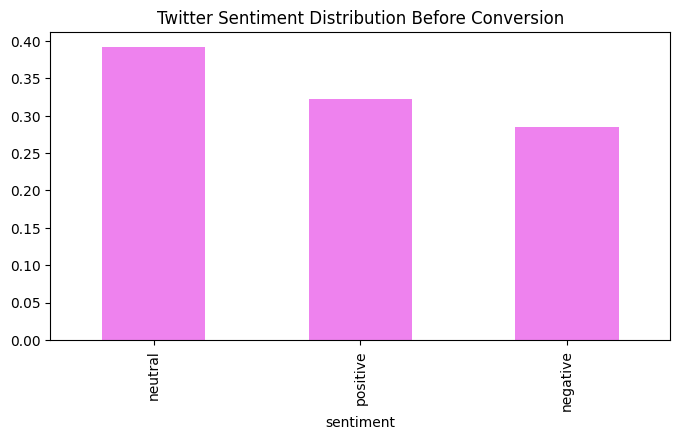

In [9]:
plt.figure(figsize=(8, 4))
df['sentiment'].value_counts(normalize=True).plot(kind='bar',color='violet')
plt.title('Twitter Sentiment Distribution Before Conversion')
plt.show()

Convert categorical variables

In [10]:
df['sentiment'] = pd.Categorical(df['sentiment']).codes
df['Time of Tweet'] = pd.Categorical(df['Time of Tweet']).codes
df['Country'] = pd.Categorical(df['Country']).codes

Age group conversion to numerical approximation

In [11]:
age_mapping = {'0-20': 18, '21-30': 25, '31-45': 38, '46-60': 53, '60-70': 65, '70-100': 80}
df['Age of User'] = df['Age of User'].map(age_mapping)

Age Distribution of Users

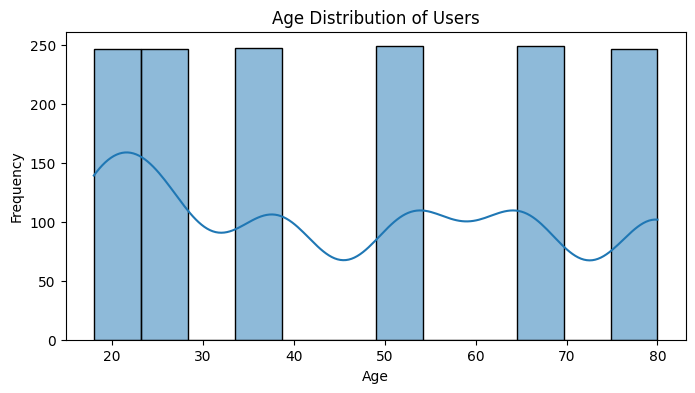

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age of User'], kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


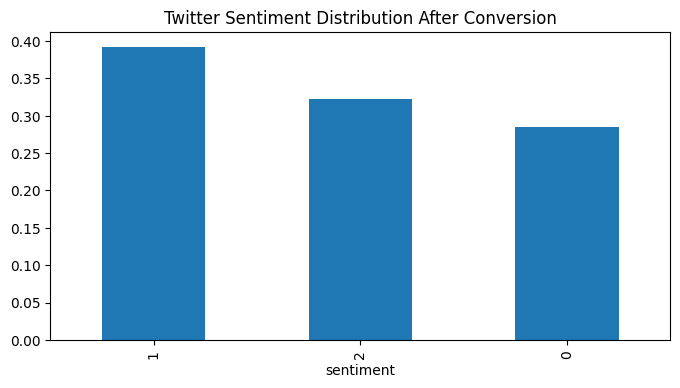

In [13]:
#Plotting Twitter Sentiment Distribution After Conversion
plt.figure(figsize=(8, 4))
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.title('Twitter Sentiment Distribution After Conversion')
plt.show()


Drop Irrelevant columns

In [14]:
df1= df.drop(columns=['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

Preprocessing function for text data

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\\W', " ", text) 
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)    
    return text

Text cleaning

In [16]:
df1['cleaned_text'] = df1["selected_text"].apply(clean_text)

In [17]:
df1.head()

,text,selected_text,sentiment,cleaned_text
0,not well,not well,0,not well
1,Not a prob hun,Not a prob,2,not a prob
2,"at dads, watching some mtv and am going on sim...","at dads, watching some mtv and am going on sim...",1,at dads watching some mtv and am going on in ...
3,Absolutely,Absolutely,1,absolutely
4,what`s the matter chickadee?,what`s the matter chickadee?,1,whats the matter chickadee


Prepare data for modeling

In [18]:
X = df1['cleaned_text']
y = df1['sentiment']

In [19]:
print(X)


0                                                not well
1                                              not a prob
2       at dads watching some mtv and am going on  in ...
3                                              absolutely
4                              whats the matter chickadee
                              ...                        
1515                                                 onna
1516                           hes just not that into you
1517     oh marly im so sorry  i hope you find her soon  
1518                                          interesting
1519    is cleaning the house for her family who is co...
Name: cleaned_text, Length: 1487, dtype: object


In [20]:
print(y)

0       0
1       2
2       1
3       1
4       1
       ..
1515    0
1516    1
1517    1
1518    2
1519    1
Name: sentiment, Length: 1487, dtype: int8


Splitting dataset into train and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(1487,) (1189,) (298,)


Converting Textual Data to Numerical Data

 ~ Text Vectorization

In [23]:
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [24]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7414 stored elements and shape (1189, 2247)>
  Coords	Values
  (0, 1159)	0.8295501360989468
  (0, 808)	0.5584322445008157
  (1, 1052)	0.2240658532743088
  (1, 1571)	0.4116923602025484
  (1, 1920)	0.2212558343792772
  (1, 305)	0.2732327836513697
  (1, 745)	0.3606364274801305
  (1, 1912)	0.3730700380657545
  (1, 1292)	0.4116923602025484
  (1, 2167)	0.2346104615145759
  (1, 1304)	0.18127991776170685
  (1, 1002)	0.3606364274801305
  (2, 1573)	0.20298424976406534
  (2, 551)	0.1804871814444442
  (2, 1935)	0.38347143120850957
  (2, 1757)	0.16629736833667053
  (2, 1215)	0.2530694983662445
  (2, 2057)	0.22596704574604587
  (2, 1615)	0.28889699192523866
  (2, 271)	0.28889699192523866
  (2, 2139)	0.1886059997904186
  (2, 1460)	0.24594062084465199
  (2, 2063)	0.27304307346485057
  (2, 1976)	0.2530694983662445
  (2, 1217)	0.1441739602230907
  :	:
  (1182, 698)	0.7971229444398178
  (1183, 288)	0.3307797447256133
  (1183, 1986)	0.247187328

In [25]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1451 stored elements and shape (298, 2247)>
  Coords	Values
  (2, 137)	0.21967144690576418
  (2, 155)	0.20527565020344554
  (2, 181)	0.17438051830571213
  (2, 199)	0.2538693291840858
  (2, 228)	0.29821054078613146
  (2, 428)	0.2258931394749473
  (2, 738)	0.14593772097014587
  (2, 910)	0.2476476366149027
  (2, 915)	0.4588100304929617
  (2, 1096)	0.22940501524648085
  (2, 1330)	0.2538693291840858
  (2, 1673)	0.29821054078613146
  (2, 1935)	0.1979169497658088
  (2, 2198)	0.26122802962172254
  (2, 2213)	0.26122802962172254
  (3, 1919)	1.0
  (4, 1368)	0.4578437959122078
  (4, 1991)	0.8890326532499808
  (5, 72)	0.20918434415664608
  (5, 782)	0.279654770677705
  (5, 799)	0.28162774401866053
  (5, 803)	0.290238164120514
  (5, 881)	0.24515637337726814
  (5, 1568)	0.3691928073880498
  (5, 1643)	0.3691928073880498
  :	:
  (291, 2028)	0.2347821147092077
  (291, 2049)	0.20219487262580627
  (291, 2172)	0.30280514684662635
  (292, 1011)	0.

Training the Machine Learning Model

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [27]:
# Prediction on the training data
training_data_predict = model.predict(X_train)
print(training_data_predict)

[2 1 1 ... 2 2 2]


In [28]:
#Accuracy score on training data
training_data_accuracy= accuracy_score(y_train,training_data_predict)
print("Accuracy score on the training data is ",training_data_accuracy)

Accuracy score on the training data is  0.9419680403700589


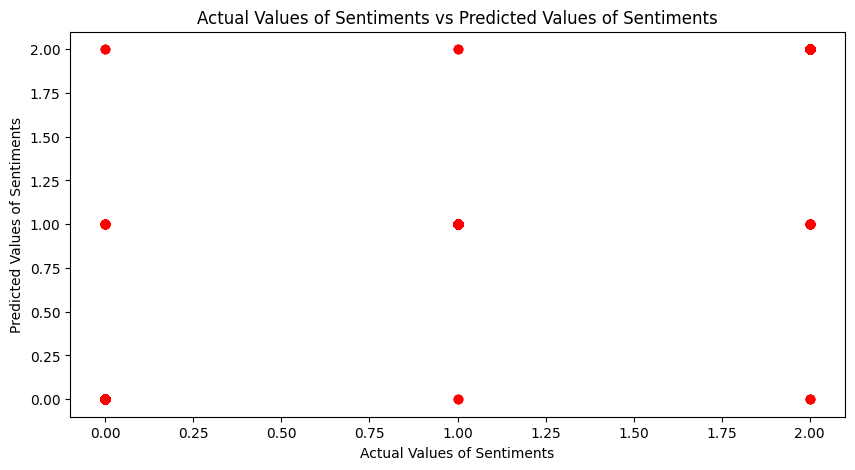

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, training_data_predict, color='red')
plt.xlabel("Actual Values of Sentiments")
plt.ylabel("Predicted Values of Sentiments")
plt.title("Actual Values of Sentiments vs Predicted Values of Sentiments")
plt.show()


This scatter plot depicts that the predicted values of sentiments is also among 0,1,2

In [30]:
#Prediction on Testing Data
test_data_predict = model.predict(X_test)
print(test_data_predict)

[0 0 1 2 1 1 0 2 2 1 2 1 0 0 1 0 1 1 1 2 0 1 1 1 1 1 0 1 2 1 2 0 0 0 0 1 2
 1 0 0 2 0 1 1 0 1 2 0 1 1 0 1 2 1 0 1 2 0 1 2 1 2 0 2 0 0 0 0 1 0 0 1 2 1
 1 0 1 1 1 1 0 2 1 0 2 1 1 1 2 1 2 0 1 1 0 0 1 1 1 1 1 0 0 2 1 0 1 1 1 0 1
 0 2 1 1 0 0 1 0 1 1 1 2 0 0 1 2 0 0 0 1 1 1 2 0 1 1 1 2 1 2 1 1 2 2 1 2 0
 1 0 0 2 2 2 0 1 1 0 1 0 0 2 0 0 1 1 2 0 0 1 0 1 2 1 1 2 1 2 1 1 0 0 1 0 1
 1 1 1 0 2 1 1 2 2 2 2 0 0 1 2 1 0 0 1 1 0 0 0 1 2 0 1 1 2 1 2 1 2 1 2 2 1
 0 0 0 0 0 1 1 0 0 0 2 0 0 0 1 2 1 2 2 0 1 0 1 0 0 2 0 2 1 1 0 1 1 1 0 0 1
 2 1 1 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 0 1 2 1 0 2 2 2 2 1
 1 1]


In [31]:
#Accuracy score on the test data
test_data_accuracy= accuracy_score(y_test, test_data_predict)
print("Accuracy score on the testing data is ",test_data_accuracy)

Accuracy score on the testing data is  0.785234899328859


So the Model Accuracy is 78.5%

Hence our Model is working perfectly

Function for sentiment prediction

In [32]:
def predict_sentiment(example_text):
    cleaned_text = clean_text(example_text)
    vectorized_text = vect.transform([cleaned_text])
    prediction =  model.predict(vectorized_text) 
    if (prediction == 0):
        print("Sentiment = Negative" )
    elif (prediction == 1):
        print("Sentiment = Neutral" )
    else :
        print("Sentiment = Positive" )

~ Examples Usage

In [33]:
example_text = "I am Sad"
predict_sentiment(example_text)

Sentiment = Negative


In [34]:
example_text = "I am Happy"
predict_sentiment(example_text)

Sentiment = Positive


In [35]:
example_text = "I love my family"
predict_sentiment(example_text)

Sentiment = Positive


In [36]:
example_text = "I do not like you"
predict_sentiment(example_text)

Sentiment = Neutral


In [37]:
example_text = " kill you"
predict_sentiment(example_text)

Sentiment = Negative


Hence,Our Model is working properly and we are able to classify user sentiments successfully